### Load dataset

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
df = pd.read_csv("blood_donor_dataset.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   donor_id                     10000 non-null  object
 1   name                         10000 non-null  object
 2   email                        10000 non-null  object
 3   password                     10000 non-null  object
 4   contact_number               10000 non-null  object
 5   city                         10000 non-null  object
 6   blood_group                  10000 non-null  object
 7   availability                 10000 non-null  object
 8   months_since_first_donation  10000 non-null  int64 
 9   number_of_donation           10000 non-null  int64 
 10  pints_donated                10000 non-null  int64 
 11  created_at                   10000 non-null  object
dtypes: int64(3), object(9)
memory usage: 937.6+ KB


,months_since_first_donation,number_of_donation,pints_donated
count,10000.000000,10000.000000,10000.000000
mean,59.953100,25.128200,37.614000
std,34.911379,14.654195,26.334072
min,0.000000,0.000000,0.000000
25%,30.000000,12.000000,16.000000
50%,60.000000,26.000000,34.000000
75%,90.000000,38.000000,50.000000
max,120.000000,50.000000,100.000000


In [3]:
print(df['availability'].value_counts())

availability
Yes    5085
No     4915
Name: count, dtype: int64


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

### Visualization

#### Distribution of Availability

/tmp/ipykernel_1972/1403446169.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="availability", data=df, palette={"Yes": "deeppink", "No": "navy"})


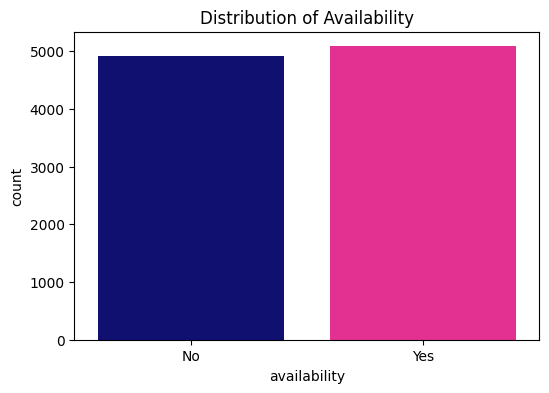

In [58]:
plt.figure(figsize=(6, 4))
sns.countplot(x="availability", data=df, palette={"Yes": "deeppink", "No": "navy"})
plt.title("Distribution of Availability")
plt.show()


#### Number of Donations Distribution by Blood Group

/tmp/ipykernel_1972/311169324.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


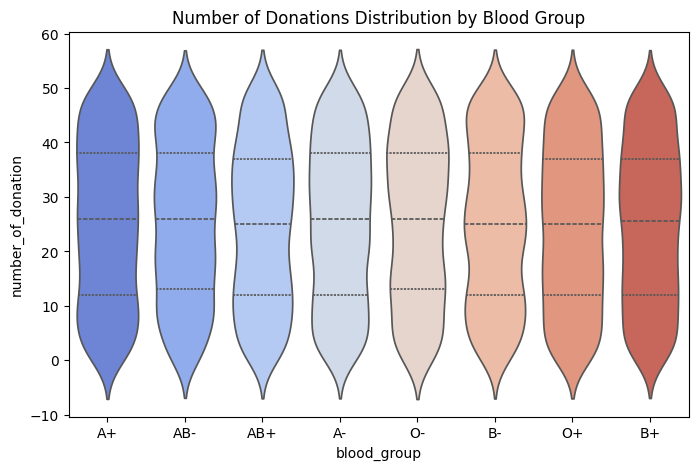

In [ ]:
# Violin Plot
plt.figure(figsize=(8, 5))
sns.violinplot(
    x='blood_group', 
    y='number_of_donation', 
    data=df, 
    palette='coolwarm', 
    inner='quartile'  
)
plt.title('Number of Donations Distribution by Blood Group')
plt.show()

#### Blood group distribution

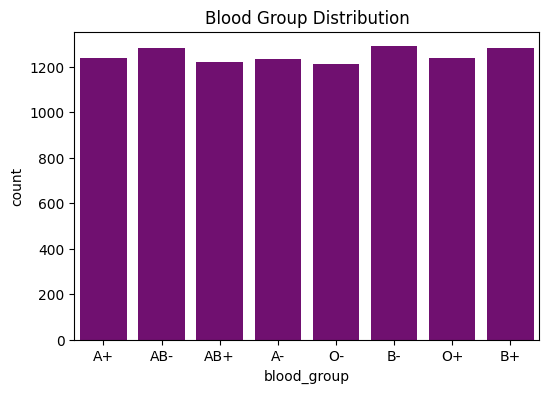

In [59]:
plt.figure(figsize=(6, 4))
sns.countplot(x="blood_group", data=df, color="purple") 
plt.title("Blood Group Distribution")
plt.show()

#### Number of donations histogram

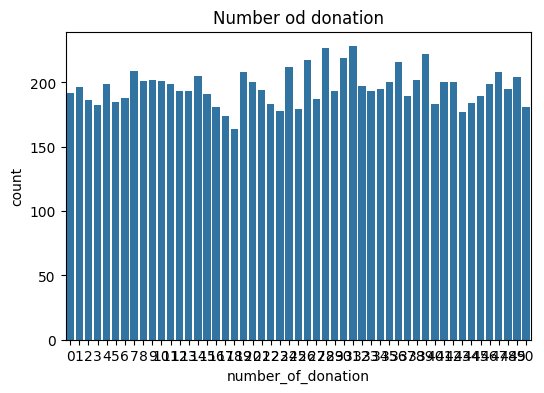

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x="number_of_donation", data=df)
plt.title("Number od donation")
plt.show()


#### Heatmap of Donation Features

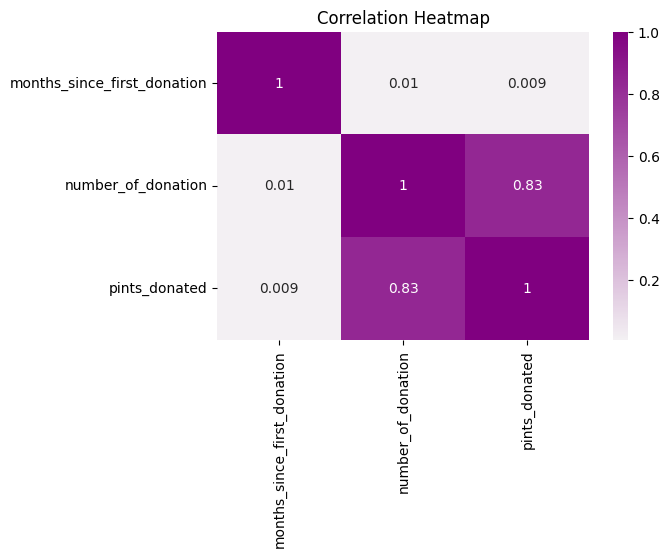

In [60]:
plt.figure(figsize=(6,4))
sns.heatmap(
    df[['months_since_first_donation','number_of_donation','pints_donated']].corr(), 
    annot=True, 
    cmap=sns.light_palette("purple", as_cmap=True)
)
plt.title("Correlation Heatmap")
plt.show()

#### Trend of Donated Pints Over Time

In [8]:
#Trend of Donated Pints Over Time

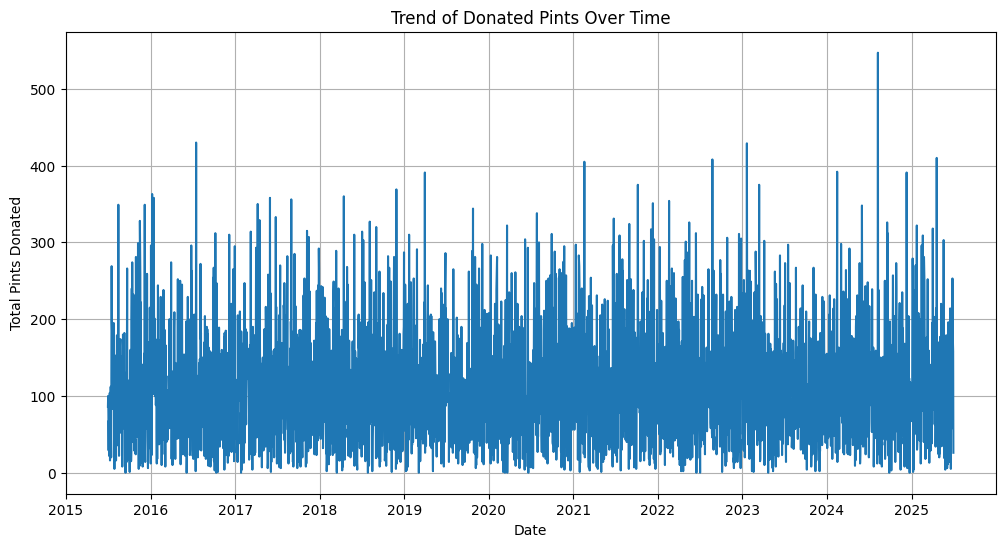

In [9]:
df['created_at'] = pd.to_datetime(df['created_at'])

# grouping by date
daily_pints = df.groupby(df['created_at'].dt.date)['pints_donated'].sum()

plt.figure(figsize=(12,6))
daily_pints.plot()
plt.title('Trend of Donated Pints Over Time')
plt.xlabel('Date')
plt.ylabel('Total Pints Donated')
plt.grid(True)
plt.show()

### Data Preprocessing

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   donor_id                     10000 non-null  object        
 1   name                         10000 non-null  object        
 2   email                        10000 non-null  object        
 3   password                     10000 non-null  object        
 4   contact_number               10000 non-null  object        
 5   city                         10000 non-null  object        
 6   blood_group                  10000 non-null  object        
 7   availability                 10000 non-null  object        
 8   months_since_first_donation  10000 non-null  int64         
 9   number_of_donation           10000 non-null  int64         
 10  pints_donated                10000 non-null  int64         
 11  created_at                   10000 non-nul

### Baseline Model

In [12]:
df = df.drop(columns=["donor_id", "name", "email", "password", "contact_number"])

In [13]:
df['availability'] = df['availability'].map({'Yes':1, 'No':0}) 

In [14]:
# Features / Target
X = df.drop(columns=["availability"])
y = df["availability"]

In [24]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [16]:
categorical_features = ["city", "blood_group"]
numeric_features = ["months_since_first_donation", "number_of_donation", "pints_donated"]

In [19]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", StandardScaler(), numeric_features)
    ]
)

In [20]:
model=Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [25]:
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [26]:
y_pred=model.predict(X_test)

In [27]:
#  Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.31      0.37       983
           1       0.50      0.66      0.57      1017

    accuracy                           0.49      2000
   macro avg       0.48      0.48      0.47      2000
weighted avg       0.48      0.49      0.47      2000



In [28]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[303 680]
 [346 671]]


### Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [30]:
dt_model=Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
        criterion='gini',
        max_depth=None,
        random_state=42
    ))
])

In [31]:
dt_model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [32]:
y_pred_dt=dt_model.predict(X_test)

In [33]:
# Evalution
accuracy_score(y_test, y_pred_dt)

0.492

In [34]:
classification_report(y_test, y_pred_dt)

'              precision    recall  f1-score   support\n\n           0       0.48      0.46      0.47       983\n           1       0.50      0.52      0.51      1017\n\n    accuracy                           0.49      2000\n   macro avg       0.49      0.49      0.49      2000\nweighted avg       0.49      0.49      0.49      2000\n'

In [35]:
confusion_matrix(y_test, y_pred_dt)

array([[457, 526],
       [490, 527]])

### Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier


In [37]:
rf_model=Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        random_state=42,
         n_jobs=-1
    ))
])

In [38]:
rf_model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [39]:
y_pred_rf=rf_model.predict(X_test)

In [40]:
accuracy_score(y_test, y_pred_rf)

0.496

In [41]:
classification_report(y_test, y_pred_rf)

'              precision    recall  f1-score   support\n\n           0       0.49      0.49      0.49       983\n           1       0.50      0.50      0.50      1017\n\n    accuracy                           0.50      2000\n   macro avg       0.50      0.50      0.50      2000\nweighted avg       0.50      0.50      0.50      2000\n'

In [42]:
confusion_matrix(y_test, y_pred_rf)

array([[479, 504],
       [504, 513]])

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [53]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=8, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42, n_jobs=-1)
}

results = []

for name, clf in models.items():
   
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", clf)
    ])
    
    
    pipe.fit(X_train, y_train)
    
    
    y_pred = pipe.predict(X_test)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression    0.4870   0.496669  0.659784  0.566723
1        Decision Tree    0.4915   0.500000  0.463127  0.480858
2        Random Forest    0.4900   0.498589  0.521141  0.509615


Comparison:

* **Logistic Regression** → highest Recall (0.66) → meaning it correctly identifies more "available" donors. This is good when the concern is not to miss potential blood donors.
* **Decision Tree** → lowest Recall and F1 → weaker compared to the others.
* **Random Forest** → highest F1-score (0.51) → indicating a better balance between Precision and Recall.